<a href="https://colab.research.google.com/github/sourcefaris/py_analytics_model/blob/main/link_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Langkah 1: Mengimpor library yang diperlukan

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Langkah 2: Menyiapkan data simulasi
## Data ini mencontohkan bagaimana berbagai sumber informasi dapat diintegrasikan

In [2]:
nodes = [
    # Individu (Pelaku, Saksi, Keluarga)
    ('Budi Santoso', {'type': 'Individu', 'role': 'Pelaku'}),
    ('Andi Wijaya', {'type': 'Individu', 'role': 'Pelaku'}),
    ('Siti Aminah', {'type': 'Individu', 'role': 'Saksi'}),
    ('Dini Kusuma', {'type': 'Individu', 'role': 'Keluarga'}),

    # Entitas (Perusahaan, Yayasan)
    ('PT Jaya Makmur', {'type': 'Perusahaan'}),
    ('PT Cipta Karya', {'type': 'Perusahaan'}),
    ('Yayasan Abadi', {'type': 'Yayasan'}),
]

### Hubungan (Edges) dengan metadata sumber data
### Format: (Simpul_1, Simpul_2, Atribut_hubungan)

In [3]:
edges = [
    # Data Forensik Digital (misal: dari chat/email)
    ('Budi Santoso', 'Andi Wijaya', {'relation': 'Komunikasi Intens', 'source': 'Forensik Digital'}),
    ('Andi Wijaya', 'PT Cipta Karya', {'relation': 'Email Kantor', 'source': 'Forensik Digital'}),

    # Data Keuangan (misal: dari rekening bank)
    ('Budi Santoso', 'PT Jaya Makmur', {'relation': 'Transaksi', 'source': 'Keuangan'}),
    ('PT Jaya Makmur', 'Yayasan Abadi', {'relation': 'Donasi', 'source': 'Keuangan'}),
    ('Andi Wijaya', 'Dini Kusuma', {'relation': 'Transfer Dana', 'source': 'Keuangan'}),

    # Dokumen Publik (misal: dari AHU)
    ('Budi Santoso', 'PT Jaya Makmur', {'relation': 'Direktur Utama', 'source': 'Dokumen Publik'}),
    ('Andi Wijaya', 'PT Cipta Karya', {'relation': 'Komisaris', 'source': 'Dokumen Publik'}),

    # Data LHKPN
    ('Budi Santoso', 'PT Jaya Makmur', {'relation': 'Pemilik Saham', 'source': 'LHKPN'}),

    # Informasi Saksi
    ('Siti Aminah', 'Budi Santoso', {'relation': 'Saksi Kunci', 'source': 'Saksi'}),

    # Intelijen
    ('Andi Wijaya', 'Yayasan Abadi', {'relation': 'Pendiri', 'source': 'Intelijen'}),
]

# Langkah 3: Membangun objek grafik dengan NetworkX

In [4]:
G = nx.DiGraph()

# Menambahkan simpul (nodes)
for node, attr in nodes:
    G.add_node(node, **attr)

# Menambahkan hubungan (edges)
for u, v, attr in edges:
    # Aggregasi data jika ada hubungan ganda (misal: dari Dokumen Publik & LHKPN)
    if G.has_edge(u, v):
        G[u][v]['relation'] += f", {attr['relation']}"
        G[u][v]['source'] += f", {attr['source']}"
    else:
        G.add_edge(u, v, **attr)

# Langkah 4: Menggambar grafik dengan visualisasi

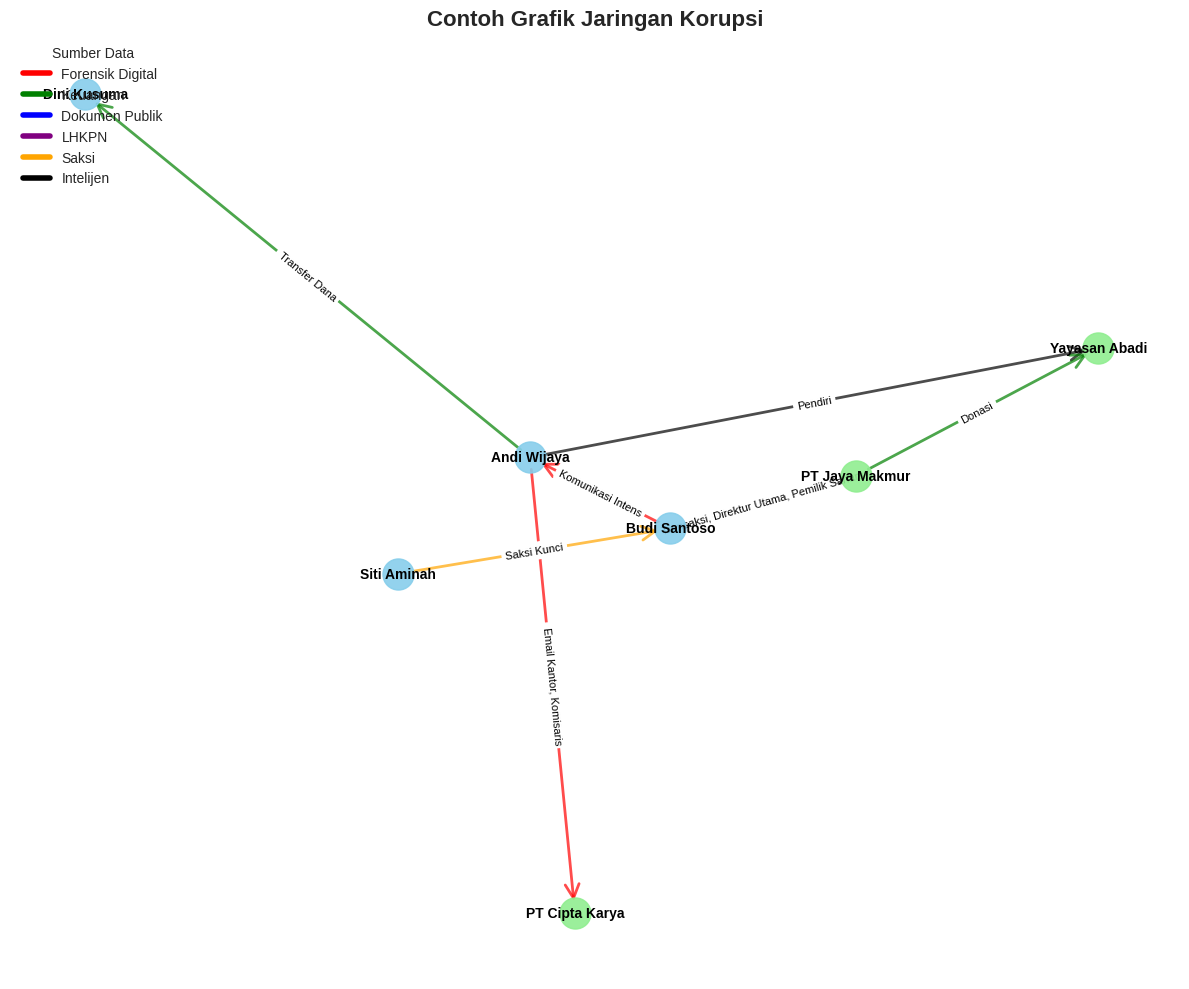

In [5]:
plt.style.use('seaborn-v0_8-whitegrid') # Menggunakan gaya plot yang lebih bersih
fig, ax = plt.subplots(figsize=(12, 10))

# --- Mengatur posisi simpul (nodes) ---
pos = nx.spring_layout(G, k=0.5, iterations=50) # Algoritma penataan untuk visualisasi yang lebih rapi

# --- Mengatur visualisasi simpul ---

individu_nodes = [n for n, d in G.nodes(data=True) if d['type'] == 'Individu']
entitas_nodes = [n for n, d in G.nodes(data=True) if d['type'] != 'Individu']

nx.draw_networkx_nodes(G, pos, nodelist=individu_nodes, node_color='skyblue', node_size=500, alpha=0.9, node_shape='o', label='Individu')
nx.draw_networkx_nodes(G, pos, nodelist=entitas_nodes, node_color='lightgreen', node_size=500, alpha=0.9, node_shape='o', label='Entitas')

# --- Mengatur visualisasi sisi (edges) ---
edge_colors = {'Forensik Digital': 'red', 'Keuangan': 'green', 'Dokumen Publik': 'blue',
               'LHKPN': 'purple', 'Saksi': 'orange', 'Intelijen': 'black'}

for edge in G.edges(data=True):
    u, v, attr = edge
    # Asumsi: Ambil sumber data pertama jika ada ganda
    source_key = attr['source'].split(',')[0].strip()
    color = edge_colors.get(source_key, 'gray')
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=25, edgelist=[(u,v)], width=2, edge_color=color, alpha=0.7)

# --- Menambahkan label ---
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif', font_weight='bold')
edge_labels = {(u, v): attr['relation'] for u, v, attr in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# --- Menambahkan legenda ---
legend_elements = [plt.Line2D([0], [0], color=color, lw=4, label=label) for label, color in edge_colors.items()]
ax.legend(handles=legend_elements, loc='upper left', title="Sumber Data")

# --- Pengaturan plot lainnya ---
ax.set_title("Contoh Grafik Jaringan Korupsi", fontsize=16, fontweight='bold')
ax.axis('off') # Sembunyikan sumbu
plt.tight_layout()

plt.show()